In [32]:
import numpy as np
import pandas as pd

In [33]:
# Data Pre Processing
data = pd.read_csv(r'C:\Users\pooja_dj\PycharmProjects\flaskProject1\car.csv')

In [34]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [35]:
data = data.drop(['Car_Name'], axis=1)

In [4]:
data['current_year'] = 2021
data['no_year'] = data['current_year'] - data['Year']

In [5]:
# We have successfully added the current_ year now we will add number_of_years
# column and drop Year and Current _year column.
data = data.drop(['Year','current_year'],axis = 1)

In [6]:
# This dataset contains some Categorical values such as fuel
# type, owner type, seller type, so we need to encode these categorical data into an encoded format
# to better train our model, to do this I used get_Dummies() method of pandas and this converted the
# whole Categorical values in the dataset into binary values
data = pd.get_dummies(data,drop_first=True)

In [7]:
data = data[['Selling_Price','Present_Price','Kms_Driven','no_year','Owner','Fuel_Type_Diesel','Fuel_Type_Petrol','Seller_Type_Individual','Transmission_Manual']]

In [36]:
data

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [37]:
# The data. corr() will give you an intuition on the correlation between all attributes in the dataset.
# More correlated features can be removed since they can lead to overfitting of the model.
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [10]:
# Splitting dataset into dependent and independent variable.
# To train and develop a model, first of all, we need to the dependent and independent variables. To find
# these variables, first I used to find the correlation between the variables of the output and then separates
# my variables into two different axes we call it x and y where the x-axis contains all the independent
# variable and y-axis having the dependent variable, in our model its selling price of the Used Cars.
x = data.iloc[:,1:]
y = data.iloc[:,0]

,Selling_Price,Present_Price,Kms_Driven,no_year,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.236141,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.047584,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.524342,0.089216,0.172515,-0.172874,-0.101419,-0.162510
no_year,-0.236141,0.047584,0.524342,1.000000,0.182104,-0.064315,0.059959,0.039896,-0.000394
Owner,-0.088344,0.008057,0.089216,0.182104,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.064315,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.059959,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.039896,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.000394,-0.050316,-0.098643,0.091013,0.063240,1.000000


In [11]:
# extratressregressor library allows you to view feature importances
# and thereby remove the less important features from the data
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

In [12]:
model.feature_importances_

ExtraTreesRegressor()

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

array([4.22153317e-01, 3.67527994e-02, 8.33441196e-02, 3.53829940e-04,
       2.02623652e-01, 1.09924302e-02, 1.22396094e-01, 1.21383757e-01])

In [14]:
# Hyperparameter Optimization to get good results
# This is done so as to get the optimal values for use in our model,
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]

In [15]:
from sklearn.model_selection import RandomizedSearchCV

In [16]:
# Training the model
# used the random forest regressor to predict the selling prices
# since this is a regression problem
# and that random forest uses multiple decision trees
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)

In [17]:
#  RandomizedSearchCV to get the best Hyper-Parameters for result prediction
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

hyp = RandomizedSearchCV(estimator = model,param_distributions=grid,
    n_iter=10,
    scoring= 'neg_mean_squared_error',
    cv=5,verbose = 2, random_state = 42,n_jobs = 1)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [18]:
hyp.fit(x_train,y_train)

In [19]:
y_pred = hyp.predict(x_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [20]:
y_pred

In [21]:
import seaborn as sns

array([ 6.96364359,  0.51652227,  4.96030922,  8.43550216, 12.37294619,
        5.27565458,  3.35365899,  0.42820921,  3.95276259,  4.99873546,
        2.83432981,  0.66529552,  5.10333361,  7.21752596,  7.49439608,
       12.58821293,  6.90574807,  4.16742962,  0.47790937,  1.30604499,
        3.30283042,  5.21053342,  5.38910498, 10.41723769,  0.23656983,
        0.68748747,  0.32812626,  0.67517715,  0.5032538 ,  4.80458004,
        2.83760214,  5.85653461,  0.5175797 ,  7.07787954,  3.30992279,
        1.15034107,  5.70258233,  5.46126919,  0.25320481,  7.72341556,
        7.62482424, 21.90887121,  5.08959105,  4.52329351,  5.61250524,
       10.32688177,  0.25634437,  0.75136923,  5.39604885,  6.72708073,
        6.68868343,  2.96474514,  5.30057794, 21.91741189,  1.15043   ,
        1.14969786,  0.41575215,  2.76276564,  3.68672704,  2.49986732,
        4.53684139])

C:\Users\pooja_dj\PycharmProjects\flaskProject1\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

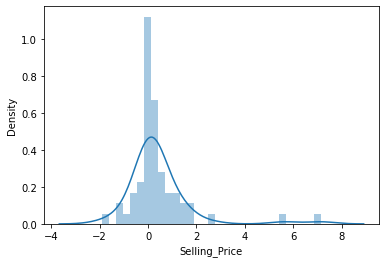

In [38]:
sns.distplot(y_test-y_pred)


In [39]:
# R² Score: It is a statistical measure of how close the data
# are to the fitted regression line
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.924195704773637


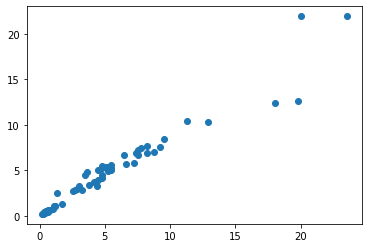

In [24]:
# Flask framework for deployment, it is necessary to pack this whole model and
# import it into the python file for creating web applications.
# Hence we dump our model into the pickle file using the given code.
import pickle
file = open('file.pkl','wb')

pickle.dump(hyp,file)




